# 02. Tensor Operations and Mathematics 🧮

Welcome to the mathematical heart of PyTorch! Now that you understand basic tensors, let's explore the powerful operations that make neural networks possible.

By the end of this notebook, you'll understand:

- 🧮 **Advanced tensor operations** and linear algebra
- 📊 **Broadcasting** and how it makes operations efficient
- 🔄 **Reduction operations** (sum, mean, etc.)
- 📐 **Linear algebra fundamentals** (dot products, matrix multiplication)
- ⚡ **Performance optimization** tips
- 🎯 **Real-world applications** of tensor operations

Let's dive into the mathematics that powers AI! 🚀


In [1]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Set style for better-looking plots
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# Get device
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)

print("🧮 Advanced Tensor Operations & Mathematics")
print("=" * 45)
print(f"🔥 PyTorch version: {torch.__version__}")
print(f"💻 Device: {device}")
print("✅ Ready to explore tensor mathematics!")

🧮 Advanced Tensor Operations & Mathematics
🔥 PyTorch version: 2.7.1
💻 Device: mps
✅ Ready to explore tensor mathematics!


## Broadcasting: Making Operations Efficient 📡

**Broadcasting** is one of PyTorch's most powerful features. It allows operations between tensors of different shapes without explicitly reshaping them.

### 🎯 Broadcasting Rules:

1. **Start from the rightmost dimension**
2. **Dimensions are compatible if they are equal, or one of them is 1**
3. **Missing dimensions are assumed to be 1**

Let's see this in action:


📡 Understanding Broadcasting
Example 1: Scalar + Vector
Vector:     tensor([1, 2, 3, 4]) (shape: torch.Size([4]))
Scalar:     10
Result:     tensor([11, 12, 13, 14])
Broadcasting: 10 is added to each element

Example 2: Matrix + Vector
Matrix (2x3):
tensor([[1, 2, 3],
        [4, 5, 6]])
Vector (3,):  tensor([10, 20, 30])
Result (2x3):
tensor([[11, 22, 33],
        [14, 25, 36]])
Broadcasting: Vector is added to each row

Example 3: Column Vector + Row Vector
Column vector (3x1):
tensor([[1],
        [2],
        [3]])
Row vector (2,):     tensor([10, 20])
Result (3x2):
tensor([[11, 21],
        [12, 22],
        [13, 23]])
Broadcasting: Creates all combinations


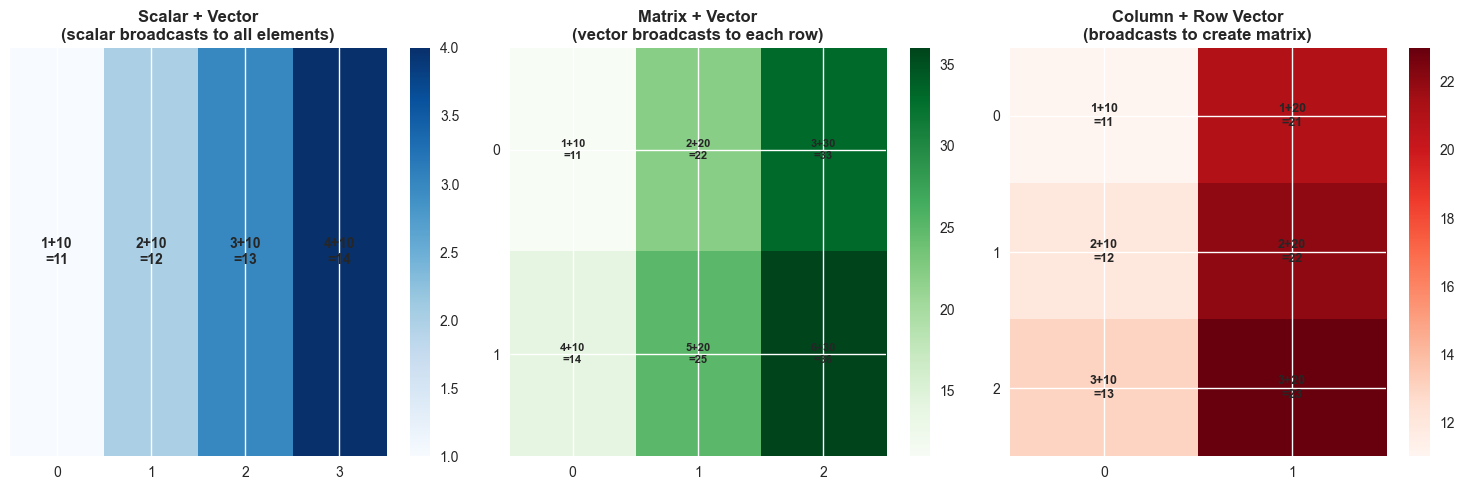


💡 Broadcasting Benefits:
   ⚡ No need to manually reshape tensors
   💾 Saves memory (no copies made)
   🚀 Faster than loops
   📝 Cleaner, more readable code


In [3]:
print("📡 Understanding Broadcasting")
print("=" * 30)

# Example 1: Scalar with tensor
a = torch.tensor([1, 2, 3, 4])
scalar = 10
result1 = a + scalar

print(f"Example 1: Scalar + Vector")
print(f"Vector:     {a} (shape: {a.shape})")
print(f"Scalar:     {scalar}")
print(f"Result:     {result1}")
print(f"Broadcasting: {scalar} is added to each element\n")

# Example 2: Vector with matrix
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
vector = torch.tensor([10, 20, 30])
result2 = matrix + vector

print(f"Example 2: Matrix + Vector")
print(f"Matrix (2x3):\n{matrix}")
print(f"Vector (3,):  {vector}")
print(f"Result (2x3):\n{result2}")
print(f"Broadcasting: Vector is added to each row\n")

# Example 3: Column vector with row vector
col_vector = torch.tensor([[1], [2], [3]])  # Shape: (3, 1)
row_vector = torch.tensor([10, 20])  # Shape: (2,)
result3 = col_vector + row_vector

print(f"Example 3: Column Vector + Row Vector")
print(f"Column vector (3x1):\n{col_vector}")
print(f"Row vector (2,):     {row_vector}")
print(f"Result (3x2):\n{result3}")
print(f"Broadcasting: Creates all combinations")

# Visualize broadcasting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Visualization 1: Scalar broadcasting
data1 = np.array([[1, 2, 3, 4]])
im1 = axes[0].imshow(data1, cmap="Blues", aspect="auto")
axes[0].set_title(
    "Scalar + Vector\n(scalar broadcasts to all elements)", fontweight="bold"
)
for i in range(4):
    axes[0].text(
        i,
        0,
        f"{a[i].item()}+{scalar}\n={result1[i].item()}",
        ha="center",
        va="center",
        fontweight="bold",
    )
axes[0].set_xticks(range(4))
axes[0].set_yticks([])
plt.colorbar(im1, ax=axes[0])

# Visualization 2: Vector broadcasting
im2 = axes[1].imshow(result2.numpy(), cmap="Greens", aspect="auto")
axes[1].set_title("Matrix + Vector\n(vector broadcasts to each row)", fontweight="bold")
for i in range(2):
    for j in range(3):
        axes[1].text(
            j,
            i,
            f"{matrix[i,j].item()}+{vector[j].item()}\n={result2[i,j].item()}",
            ha="center",
            va="center",
            fontsize=8,
            fontweight="bold",
        )
axes[1].set_xticks(range(3))
axes[1].set_yticks(range(2))
plt.colorbar(im2, ax=axes[1])

# Visualization 3: 2D broadcasting
im3 = axes[2].imshow(result3.numpy(), cmap="Reds", aspect="auto")
axes[2].set_title(
    "Column + Row Vector\n(broadcasts to create matrix)", fontweight="bold"
)
for i in range(3):
    for j in range(2):
        axes[2].text(
            j,
            i,
            f"{col_vector[i,0].item()}+{row_vector[j].item()}\n={result3[i,j].item()}",
            ha="center",
            va="center",
            fontsize=9,
            fontweight="bold",
        )
axes[2].set_xticks(range(2))
axes[2].set_yticks(range(3))
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

print("\n💡 Broadcasting Benefits:")
print("   ⚡ No need to manually reshape tensors")
print("   💾 Saves memory (no copies made)")
print("   🚀 Faster than loops")
print("   📝 Cleaner, more readable code")

## Element-wise Operations 🔄

Element-wise operations are the building blocks of tensor computations. Let's explore all the operations you'll commonly use:


In [4]:
print("🔄 Element-wise Operations")
print("=" * 28)

# Create sample tensors
torch.manual_seed(42)
a = torch.tensor([1.0, 2.0, 3.0, 4.0])
b = torch.tensor([2.0, 1.0, 4.0, 3.0])

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print()

# Basic arithmetic
print("➕ Basic Arithmetic:")
print(f"Addition:        a + b = {a + b}")
print(f"Subtraction:     a - b = {a - b}")
print(f"Multiplication:  a * b = {a * b}")
print(f"Division:        a / b = {a / b}")
print(f"Integer division: a // b = {a // b}")
print(f"Modulo:          a % b = {a % b}")
print(f"Power:           a ** b = {a ** b}")

# Mathematical functions
print("\n🧮 Mathematical Functions:")
c = torch.tensor([0.0, 1.0, 2.0, 3.14159])
print(f"Input c: {c}")
print(f"Absolute:     |c| = {torch.abs(c)}")
print(f"Square root:  √c = {torch.sqrt(torch.abs(c))}")
print(f"Exponential:  e^c = {torch.exp(c)}")
print(f"Natural log:  ln(c+1) = {torch.log(c + 1)}")
print(f"Sine:         sin(c) = {torch.sin(c)}")
print(f"Cosine:       cos(c) = {torch.cos(c)}")

# Rounding and clipping
print("\n🎯 Rounding and Clipping:")
d = torch.tensor([-2.7, -1.3, 0.8, 2.1, 3.9])
print(f"Input d: {d}")
print(f"Round:    {torch.round(d)}")
print(f"Floor:    {torch.floor(d)}")
print(f"Ceiling:  {torch.ceil(d)}")
print(f"Truncate: {torch.trunc(d)}")
print(f"Clamp [0,2]: {torch.clamp(d, 0, 2)}")

# Comparison operations
print("\n🔍 Comparison Operations:")
print(f"a > b:  {a > b}")
print(f"a == b: {a == b}")
print(f"a >= 2: {a >= 2}")

# Logical operations
print("\n🔗 Logical Operations:")
bool_a = torch.tensor([True, False, True, False])
bool_b = torch.tensor([True, True, False, False])
print(f"bool_a: {bool_a}")
print(f"bool_b: {bool_b}")
print(f"AND:    {bool_a & bool_b}")
print(f"OR:     {bool_a | bool_b}")
print(f"NOT a:  {~bool_a}")
print(f"XOR:    {bool_a ^ bool_b}")

🔄 Element-wise Operations
Tensor a: tensor([1., 2., 3., 4.])
Tensor b: tensor([2., 1., 4., 3.])

➕ Basic Arithmetic:
Addition:        a + b = tensor([3., 3., 7., 7.])
Subtraction:     a - b = tensor([-1.,  1., -1.,  1.])
Multiplication:  a * b = tensor([ 2.,  2., 12., 12.])
Division:        a / b = tensor([0.5000, 2.0000, 0.7500, 1.3333])
Integer division: a // b = tensor([0., 2., 0., 1.])
Modulo:          a % b = tensor([1., 0., 3., 1.])
Power:           a ** b = tensor([ 1.,  2., 81., 64.])

🧮 Mathematical Functions:
Input c: tensor([0.0000, 1.0000, 2.0000, 3.1416])
Absolute:     |c| = tensor([0.0000, 1.0000, 2.0000, 3.1416])
Square root:  √c = tensor([0.0000, 1.0000, 1.4142, 1.7725])
Exponential:  e^c = tensor([ 1.0000,  2.7183,  7.3891, 23.1406])
Natural log:  ln(c+1) = tensor([0.0000, 0.6931, 1.0986, 1.4211])
Sine:         sin(c) = tensor([0.0000e+00, 8.4147e-01, 9.0930e-01, 2.5352e-06])
Cosine:       cos(c) = tensor([ 1.0000,  0.5403, -0.4161, -1.0000])

🎯 Rounding and Clipping:


## Reduction Operations 📊

Reduction operations collapse one or more dimensions of a tensor, providing summary statistics and aggregations:


📊 Reduction Operations
Sample matrix (3x4):
tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
        [-1.1229, -0.1863,  2.2082, -0.6380],
        [ 0.4617,  0.2674,  0.5349,  0.8094]])
Shape: torch.Size([3, 4])

📈 Basic Reductions (all elements):
Sum:             3.265
Mean:            0.272
Standard dev:    0.806
Variance:        0.650
Maximum:         2.208
Minimum:         -1.123
Product:         -0.000

🎯 Reductions along specific dimensions:
Sum along rows (dim=0):    tensor([-0.3245,  0.2098,  2.9776,  0.4017])
Sum along columns (dim=1): tensor([0.9303, 0.2610, 2.0733])
Mean along rows (dim=0):   tensor([-0.1082,  0.0699,  0.9925,  0.1339])
Max along columns (dim=1): torch.return_types.max(
values=tensor([0.3367, 2.2082, 0.8094]),
indices=tensor([0, 2, 3]))

🎪 Finding indices:
Index of maximum element:     6
Index of max in each row:     tensor([0, 2, 3])
Index of max in each column:  tensor([2, 2, 1, 2])

📏 Keeping dimensions with keepdim=True:
Original shape:        torch.Size([3

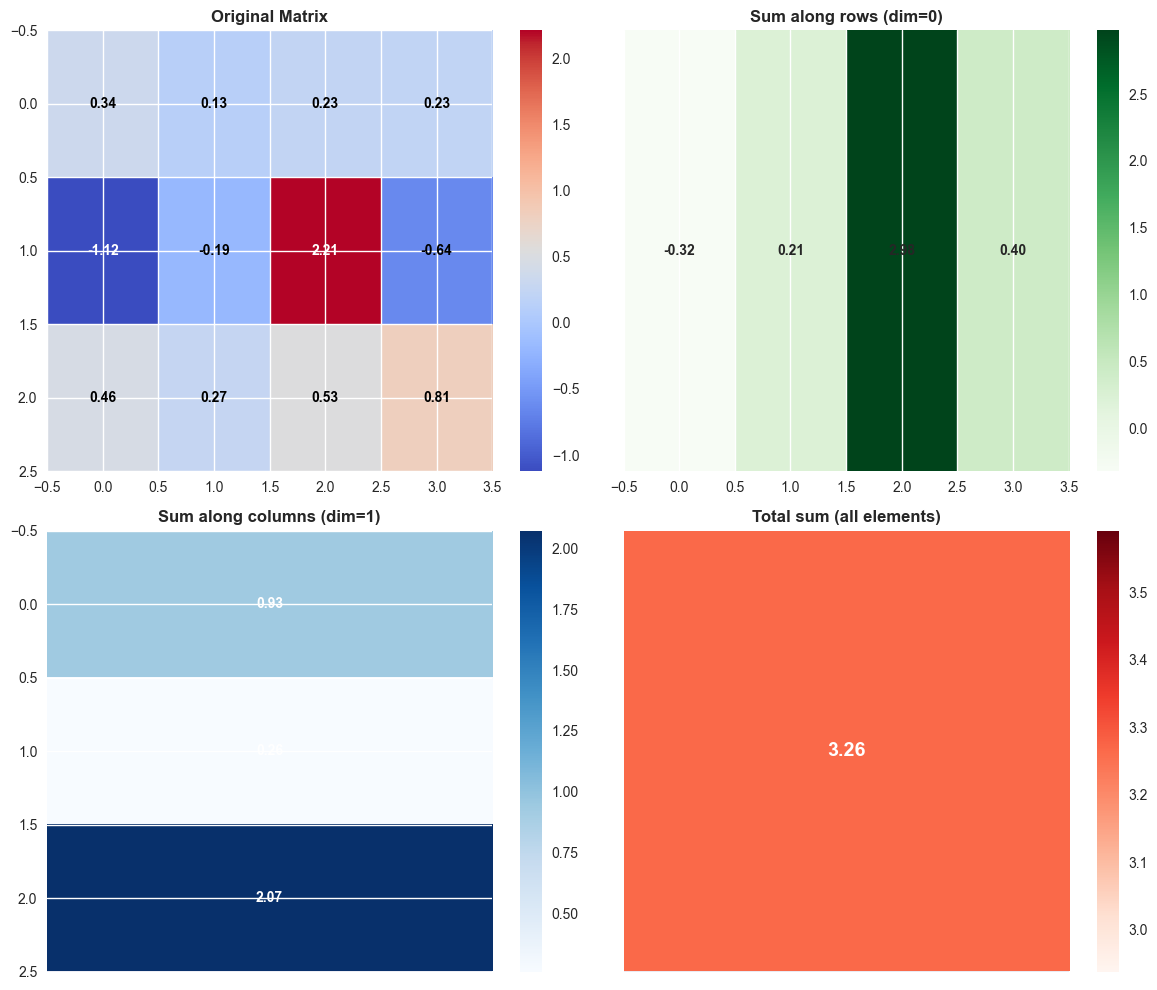


💡 Understanding Dimensions:
   dim=0: Operations along rows (combines rows)
   dim=1: Operations along columns (combines columns)
   No dim: Operations on all elements


In [5]:
print("📊 Reduction Operations")
print("=" * 25)

# Create a sample matrix
torch.manual_seed(42)
matrix = torch.randn(3, 4)
print(f"Sample matrix (3x4):\n{matrix}")
print(f"Shape: {matrix.shape}")

print("\n📈 Basic Reductions (all elements):")
print(f"Sum:             {matrix.sum():.3f}")
print(f"Mean:            {matrix.mean():.3f}")
print(f"Standard dev:    {matrix.std():.3f}")
print(f"Variance:        {matrix.var():.3f}")
print(f"Maximum:         {matrix.max():.3f}")
print(f"Minimum:         {matrix.min():.3f}")
print(f"Product:         {matrix.prod():.3f}")

print("\n🎯 Reductions along specific dimensions:")
print(f"Sum along rows (dim=0):    {matrix.sum(dim=0)}")
print(f"Sum along columns (dim=1): {matrix.sum(dim=1)}")
print(f"Mean along rows (dim=0):   {matrix.mean(dim=0)}")
print(f"Max along columns (dim=1): {matrix.max(dim=1)}")

# argmax and argmin
print("\n🎪 Finding indices:")
print(f"Index of maximum element:     {matrix.argmax()}")
print(f"Index of max in each row:     {matrix.argmax(dim=1)}")
print(f"Index of max in each column:  {matrix.argmax(dim=0)}")

# keepdim parameter
print("\n📏 Keeping dimensions with keepdim=True:")
sum_keepdim = matrix.sum(dim=1, keepdim=True)
sum_no_keepdim = matrix.sum(dim=1, keepdim=False)
print(f"Original shape:        {matrix.shape}")
print(f"Sum (keepdim=True):    {sum_keepdim.shape} → {sum_keepdim.squeeze()}")
print(f"Sum (keepdim=False):   {sum_no_keepdim.shape} → {sum_no_keepdim}")

# Visualize reductions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original matrix
im1 = axes[0, 0].imshow(matrix.numpy(), cmap="coolwarm", aspect="auto")
axes[0, 0].set_title("Original Matrix", fontweight="bold")
for i in range(3):
    for j in range(4):
        axes[0, 0].text(
            j,
            i,
            f"{matrix[i,j]:.2f}",
            ha="center",
            va="center",
            color="white" if abs(matrix[i, j]) > 1 else "black",
            fontweight="bold",
        )
plt.colorbar(im1, ax=axes[0, 0])

# Sum along rows (dim=0)
row_sums = matrix.sum(dim=0)
im2 = axes[0, 1].imshow(row_sums.unsqueeze(0).numpy(), cmap="Greens", aspect="auto")
axes[0, 1].set_title("Sum along rows (dim=0)", fontweight="bold")
for j in range(4):
    axes[0, 1].text(
        j, 0, f"{row_sums[j]:.2f}", ha="center", va="center", fontweight="bold"
    )
axes[0, 1].set_yticks([])
plt.colorbar(im2, ax=axes[0, 1])

# Sum along columns (dim=1)
col_sums = matrix.sum(dim=1)
im3 = axes[1, 0].imshow(col_sums.unsqueeze(1).numpy(), cmap="Blues", aspect="auto")
axes[1, 0].set_title("Sum along columns (dim=1)", fontweight="bold")
for i in range(3):
    axes[1, 0].text(
        0,
        i,
        f"{col_sums[i]:.2f}",
        ha="center",
        va="center",
        color="white",
        fontweight="bold",
    )
axes[1, 0].set_xticks([])
plt.colorbar(im3, ax=axes[1, 0])

# Total sum
total_sum = matrix.sum()
im4 = axes[1, 1].imshow([[total_sum.item()]], cmap="Reds", aspect="auto")
axes[1, 1].set_title("Total sum (all elements)", fontweight="bold")
axes[1, 1].text(
    0,
    0,
    f"{total_sum:.2f}",
    ha="center",
    va="center",
    color="white",
    fontsize=14,
    fontweight="bold",
)
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])
plt.colorbar(im4, ax=axes[1, 1])

plt.tight_layout()
plt.show()

print("\n💡 Understanding Dimensions:")
print("   dim=0: Operations along rows (combines rows)")
print("   dim=1: Operations along columns (combines columns)")
print("   No dim: Operations on all elements")

## Linear Algebra Operations 📐

Linear algebra is the mathematical foundation of neural networks. Let's explore the key operations:


In [6]:
print("📐 Linear Algebra Operations")
print("=" * 32)

# Create sample matrices
torch.manual_seed(42)
A = torch.randn(3, 4)
B = torch.randn(4, 2)
v = torch.randn(4)

print(f"Matrix A (3x4):\n{A}")
print(f"\nMatrix B (4x2):\n{B}")
print(f"\nVector v (4,): {v}")

print("\n🔢 Matrix Multiplication:")
# Matrix-matrix multiplication
AB = torch.matmul(A, B)  # or A @ B
print(f"A @ B (3x2):\n{AB}")

# Matrix-vector multiplication
Av = torch.matmul(A, v)  # or A @ v
print(f"\nA @ v (3,): {Av}")

# Different ways to do matrix multiplication
print("\n🎯 Different multiplication functions:")
print(f"torch.matmul(A, B):  {torch.matmul(A, B).shape}")
print(f"torch.mm(A, B):      {torch.mm(A, B).shape}")
print(f"A @ B:               {(A @ B).shape}")
print(f"torch.bmm for batches (batch matrix multiply)")

# Dot product
print("\n📍 Dot Product:")
u = torch.tensor([1.0, 2.0, 3.0])
w = torch.tensor([4.0, 5.0, 6.0])
dot_product = torch.dot(u, w)
manual_dot = (u * w).sum()
print(f"u: {u}")
print(f"w: {w}")
print(f"torch.dot(u, w): {dot_product}")
print(f"Manual: (u * w).sum(): {manual_dot}")
print(
    f"Geometric meaning: |u| * |w| * cos(θ) = {torch.norm(u)} * {torch.norm(w)} * cos(θ)"
)

# Transpose operations
print("\n🔄 Transpose Operations:")
print(f"A.T (transpose):\n{A.T}")
print(f"A.transpose(0, 1) (same as A.T):\n{A.transpose(0, 1)}")

# Norms
print("\n📏 Vector and Matrix Norms:")
print(f"L2 norm of v: {torch.norm(v):.3f}")
print(f"L1 norm of v: {torch.norm(v, p=1):.3f}")
print(f"Max norm of v: {torch.norm(v, p=float('inf')):.3f}")
print(f"Frobenius norm of A: {torch.norm(A, p='fro'):.3f}")

# Eigenvalues and eigenvectors (for square matrices)
print("\n🌟 Eigendecomposition (square matrix):")
square_matrix = torch.randn(3, 3)
symmetric_matrix = square_matrix + square_matrix.T  # Make it symmetric
eigenvalues, eigenvectors = torch.linalg.eigh(symmetric_matrix)
print(f"Symmetric matrix (3x3):\n{symmetric_matrix}")
print(f"Eigenvalues: {eigenvalues}")
print(f"Eigenvectors shape: {eigenvectors.shape}")

📐 Linear Algebra Operations
Matrix A (3x4):
tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
        [-1.1229, -0.1863,  2.2082, -0.6380],
        [ 0.4617,  0.2674,  0.5349,  0.8094]])

Matrix B (4x2):
tensor([[ 1.1103, -1.6898],
        [-0.9890,  0.9580],
        [ 1.3221,  0.8172],
        [-0.7658, -0.7506]])

Vector v (4,): tensor([ 1.3525,  0.6863, -0.3278,  0.7950])

🔢 Matrix Multiplication:
A @ B (3x2):
tensor([[ 0.3800, -0.4268],
        [ 2.3457,  4.0023],
        [ 0.3356, -0.6944]])

A @ v (3,): tensor([ 0.6501, -2.8775,  1.2760])

🎯 Different multiplication functions:
torch.matmul(A, B):  torch.Size([3, 2])
torch.mm(A, B):      torch.Size([3, 2])
A @ B:               torch.Size([3, 2])
torch.bmm for batches (batch matrix multiply)

📍 Dot Product:
u: tensor([1., 2., 3.])
w: tensor([4., 5., 6.])
torch.dot(u, w): 32.0
Manual: (u * w).sum(): 32.0
Geometric meaning: |u| * |w| * cos(θ) = 3.7416574954986572 * 8.774964332580566 * cos(θ)

🔄 Transpose Operations:
A.T (transpose):
tens

## Understanding Matrix Multiplication Visually 👁️

Matrix multiplication is so important in neural networks that it deserves a special visual explanation:


👁️ Visualizing Matrix Multiplication
Matrix A (2x3):
tensor([[1, 2, 3],
        [4, 5, 6]])

Matrix B (3x2):
tensor([[ 7,  8],
        [ 9, 10],
        [11, 12]])

Result C = A @ B (2x2):
tensor([[ 58,  64],
        [139, 154]])

🔍 Step-by-step calculation:
C[0,0] = A[0,:] • B[:,0] = tensor([1, 2, 3]) • tensor([ 7,  9, 11]) = 58
C[0,1] = A[0,:] • B[:,1] = tensor([1, 2, 3]) • tensor([ 8, 10, 12]) = 64
C[1,0] = A[1,:] • B[:,0] = tensor([4, 5, 6]) • tensor([ 7,  9, 11]) = 139
C[1,1] = A[1,:] • B[:,1] = tensor([4, 5, 6]) • tensor([ 8, 10, 12]) = 154


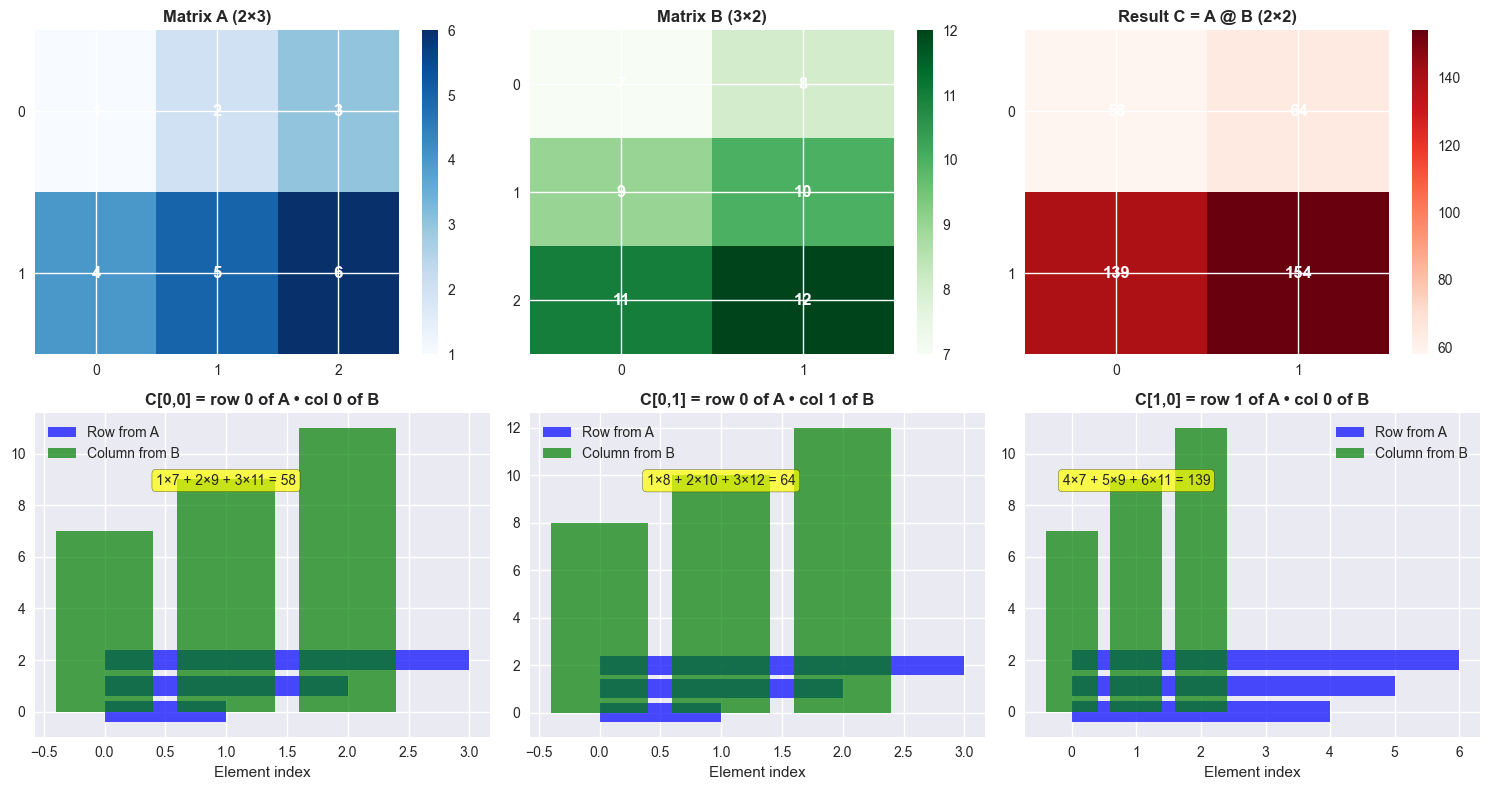


💡 Key Insights about Matrix Multiplication:
   🎯 Each element is a dot product of a row and column
   📏 Shape compatibility: (m,k) @ (k,n) → (m,n)
   🧠 This is exactly what happens in neural network layers!
   ⚡ GPUs are optimized for these operations


In [10]:
print("👁️ Visualizing Matrix Multiplication")
print("=" * 36)

# Create simple matrices for visualization
A_vis = torch.tensor([[1, 2, 3], [4, 5, 6]])
B_vis = torch.tensor([[7, 8], [9, 10], [11, 12]])
C_vis = A_vis @ B_vis

print(f"Matrix A (2x3):\n{A_vis}")
print(f"\nMatrix B (3x2):\n{B_vis}")
print(f"\nResult C = A @ B (2x2):\n{C_vis}")

# Calculate each element step by step
print("\n🔍 Step-by-step calculation:")
print(
    f"C[0,0] = A[0,:] • B[:,0] = {A_vis[0,:]} • {B_vis[:,0]} = {torch.dot(A_vis[0,:], B_vis[:,0])}"
)
print(
    f"C[0,1] = A[0,:] • B[:,1] = {A_vis[0,:]} • {B_vis[:,1]} = {torch.dot(A_vis[0,:], B_vis[:,1])}"
)
print(
    f"C[1,0] = A[1,:] • B[:,0] = {A_vis[1,:]} • {B_vis[:,0]} = {torch.dot(A_vis[1,:], B_vis[:,0])}"
)
print(
    f"C[1,1] = A[1,:] • B[:,1] = {A_vis[1,:]} • {B_vis[:,1]} = {torch.dot(A_vis[1,:], B_vis[:,1])}"
)

# Visual representation
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Matrix A
im1 = axes[0, 0].imshow(A_vis.numpy(), cmap="Blues", aspect="auto")
axes[0, 0].set_title("Matrix A (2×3)", fontweight="bold")
for i in range(2):
    for j in range(3):
        axes[0, 0].text(
            j,
            i,
            f"{A_vis[i,j]}",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white",
        )
axes[0, 0].set_xticks(range(3))
axes[0, 0].set_yticks(range(2))
plt.colorbar(im1, ax=axes[0, 0])

# Matrix B
im2 = axes[0, 1].imshow(B_vis.numpy(), cmap="Greens", aspect="auto")
axes[0, 1].set_title("Matrix B (3×2)", fontweight="bold")
for i in range(3):
    for j in range(2):
        axes[0, 1].text(
            j,
            i,
            f"{B_vis[i,j]}",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white",
        )
axes[0, 1].set_xticks(range(2))
axes[0, 1].set_yticks(range(3))
plt.colorbar(im2, ax=axes[0, 1])

# Result C
im3 = axes[0, 2].imshow(C_vis.numpy(), cmap="Reds", aspect="auto")
axes[0, 2].set_title("Result C = A @ B (2×2)", fontweight="bold")
for i in range(2):
    for j in range(2):
        axes[0, 2].text(
            j,
            i,
            f"{C_vis[i,j]}",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white",
        )
axes[0, 2].set_xticks(range(2))
axes[0, 2].set_yticks(range(2))
plt.colorbar(im3, ax=axes[0, 2])

# Show how each element is calculated
calculations = [
    ("C[0,0] = row 0 of A • col 0 of B", [1, 2, 3], [7, 9, 11], 58),
    ("C[0,1] = row 0 of A • col 1 of B", [1, 2, 3], [8, 10, 12], 64),
    ("C[1,0] = row 1 of A • col 0 of B", [4, 5, 6], [7, 9, 11], 139),
]

for idx, (title, row, col, result) in enumerate(calculations):
    ax = axes[1, idx]
    ax.barh([0, 1, 2], row, alpha=0.7, label="Row from A", color="blue")
    ax.bar([0, 1, 2], col, alpha=0.7, label="Column from B", color="green")
    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Element index")
    ax.legend()

    # Add calculation
    calc_text = f"{row[0]}×{col[0]} + {row[1]}×{col[1]} + {row[2]}×{col[2]} = {result}"
    ax.text(
        1,
        max(max(row), max(col)) * 0.8,
        calc_text,
        ha="center",
        bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.7),
    )

plt.tight_layout()
plt.show()

print("\n💡 Key Insights about Matrix Multiplication:")
print("   🎯 Each element is a dot product of a row and column")
print("   📏 Shape compatibility: (m,k) @ (k,n) → (m,n)")
print("   🧠 This is exactly what happens in neural network layers!")
print("   ⚡ GPUs are optimized for these operations")

## Performance and Memory Optimization ⚡

Understanding performance is crucial for building efficient neural networks. Let's explore optimization techniques:


⚡ Performance and Memory Optimization
🔄 In-place vs Non-in-place Operations:
Non-in-place (a + b):     0.000468 seconds
In-place (a += b):        0.000858 seconds
Memory saved: Creates no new tensor with in-place operations

💾 Memory Management:
Large tensor shape: torch.Size([1000, 1000, 100])
Memory usage: 381.5 MB

👀 Views vs Copies:
Original: 5615902016
View:     5615902016 (same memory!)
Copy:     5615925824 (different memory)

After modifying view[0,0] = 999:
Original[0,0]: 999 (also changed!)
Copy[0,0]:     0 (unchanged)

📐 Contiguous Tensors:
Original is contiguous:   True
Transposed is contiguous: False
Make contiguous:          True

🚀 Vectorization vs Loops:
Vectorized:  0.000038 seconds
Loop:        0.034916 seconds
Speedup:     921.1x faster with vectorization!
Large tensor shape: torch.Size([1000, 1000, 100])
Memory usage: 381.5 MB

👀 Views vs Copies:
Original: 5615902016
View:     5615902016 (same memory!)
Copy:     5615925824 (different memory)

After modifying view[0,0

/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_93940/1562841841.py:37: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(f"Original: {original.storage().data_ptr()}")


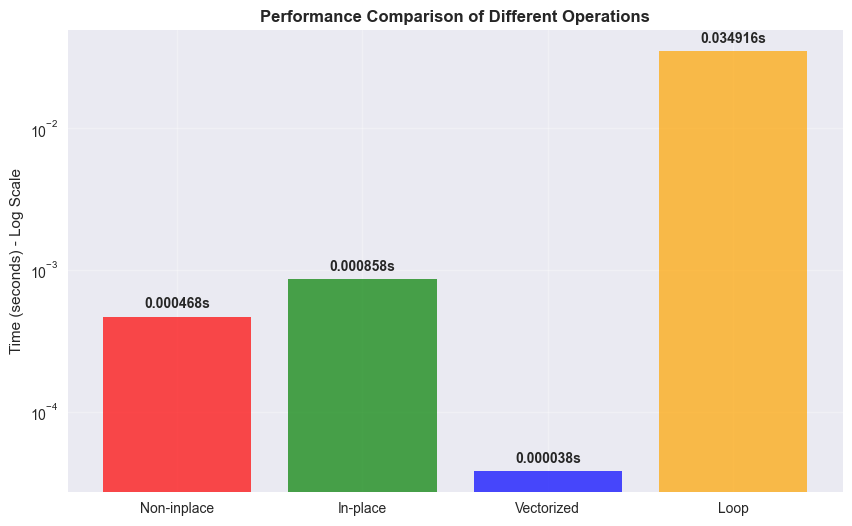


💡 Performance Tips:
   ✅ Use in-place operations when possible (but be careful with gradients!)
   ✅ Prefer views over copies
   ✅ Keep tensors contiguous
   ✅ Always vectorize instead of loops
   ✅ Use appropriate data types (float16 vs float32)
   ✅ Move tensors to GPU for large computations


In [7]:
print("⚡ Performance and Memory Optimization")
print("=" * 40)

# In-place operations
print("🔄 In-place vs Non-in-place Operations:")
a = torch.randn(1000, 1000)
b = torch.randn(1000, 1000)

# Non-in-place (creates new tensor)
start_time = time.time()
c = a + b  # Creates new tensor
non_inplace_time = time.time() - start_time

# In-place (modifies existing tensor)
a_copy = a.clone()
start_time = time.time()
a_copy += b  # Modifies a_copy in place
inplace_time = time.time() - start_time

print(f"Non-in-place (a + b):     {non_inplace_time:.6f} seconds")
print(f"In-place (a += b):        {inplace_time:.6f} seconds")
print(f"Memory saved: Creates no new tensor with in-place operations")

print("\n💾 Memory Management:")
# Check memory usage
large_tensor = torch.randn(1000, 1000, 100)
memory_mb = large_tensor.numel() * large_tensor.element_size() / (1024**2)
print(f"Large tensor shape: {large_tensor.shape}")
print(f"Memory usage: {memory_mb:.1f} MB")

# Views vs copies
print("\n👀 Views vs Copies:")
original = torch.arange(12).reshape(3, 4)
view = original.view(2, 6)  # Same memory
copy = original.clone()  # New memory

print(f"Original: {original.storage().data_ptr()}")
print(f"View:     {view.storage().data_ptr()} (same memory!)")
print(f"Copy:     {copy.storage().data_ptr()} (different memory)")

# Demonstrate view modification
view[0, 0] = 999
print(f"\nAfter modifying view[0,0] = 999:")
print(f"Original[0,0]: {original[0,0]} (also changed!)")
print(f"Copy[0,0]:     {copy[0,0]} (unchanged)")

# Contiguous tensors
print("\n📐 Contiguous Tensors:")
tensor = torch.randn(3, 4)
transposed = tensor.T
print(f"Original is contiguous:   {tensor.is_contiguous()}")
print(f"Transposed is contiguous: {transposed.is_contiguous()}")
print(f"Make contiguous:          {transposed.contiguous().is_contiguous()}")

# Vectorization vs loops
print("\n🚀 Vectorization vs Loops:")
x = torch.randn(10000)
y = torch.randn(10000)

# Vectorized operation
start_time = time.time()
result_vectorized = x * y
vectorized_time = time.time() - start_time

# Loop operation (don't do this!)
start_time = time.time()
result_loop = torch.zeros_like(x)
for i in range(len(x)):
    result_loop[i] = x[i] * y[i]
loop_time = time.time() - start_time

print(f"Vectorized:  {vectorized_time:.6f} seconds")
print(f"Loop:        {loop_time:.6f} seconds")
print(f"Speedup:     {loop_time/vectorized_time:.1f}x faster with vectorization!")

# Visualize performance comparison
operations = ["Non-inplace", "In-place", "Vectorized", "Loop"]
times = [non_inplace_time, inplace_time, vectorized_time, loop_time]
colors = ["red", "green", "blue", "orange"]

plt.figure(figsize=(10, 6))
bars = plt.bar(operations, times, color=colors, alpha=0.7)
plt.yscale("log")  # Log scale because of big differences
plt.ylabel("Time (seconds) - Log Scale")
plt.title("Performance Comparison of Different Operations", fontweight="bold")

# Add value labels on bars
for bar, time in zip(bars, times):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() * 1.1,
        f"{time:.6f}s",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

plt.grid(True, alpha=0.3)
plt.show()

print("\n💡 Performance Tips:")
print("   ✅ Use in-place operations when possible (but be careful with gradients!)")
print("   ✅ Prefer views over copies")
print("   ✅ Keep tensors contiguous")
print("   ✅ Always vectorize instead of loops")
print("   ✅ Use appropriate data types (float16 vs float32)")
print("   ✅ Move tensors to GPU for large computations")

## Real-world Application: Image Processing 🖼️

Let's apply our tensor operations knowledge to a real-world scenario - processing images!


🖼️ Real-world Application: Image Processing
Image shape: torch.Size([3, 32, 32]) (channels, height, width)
Image value range: [0.00, 1.00]

🛠️ Image Processing Operations:
Grayscale conversion: torch.Size([3, 32, 32]) → torch.Size([32, 32])
Brightness adjustment: multiply by 1.3, clamp to [0,1]
Contrast adjustment: enhance differences from mean
Horizontal flip: reverse width dimension
Blur: 3x3 averaging filter


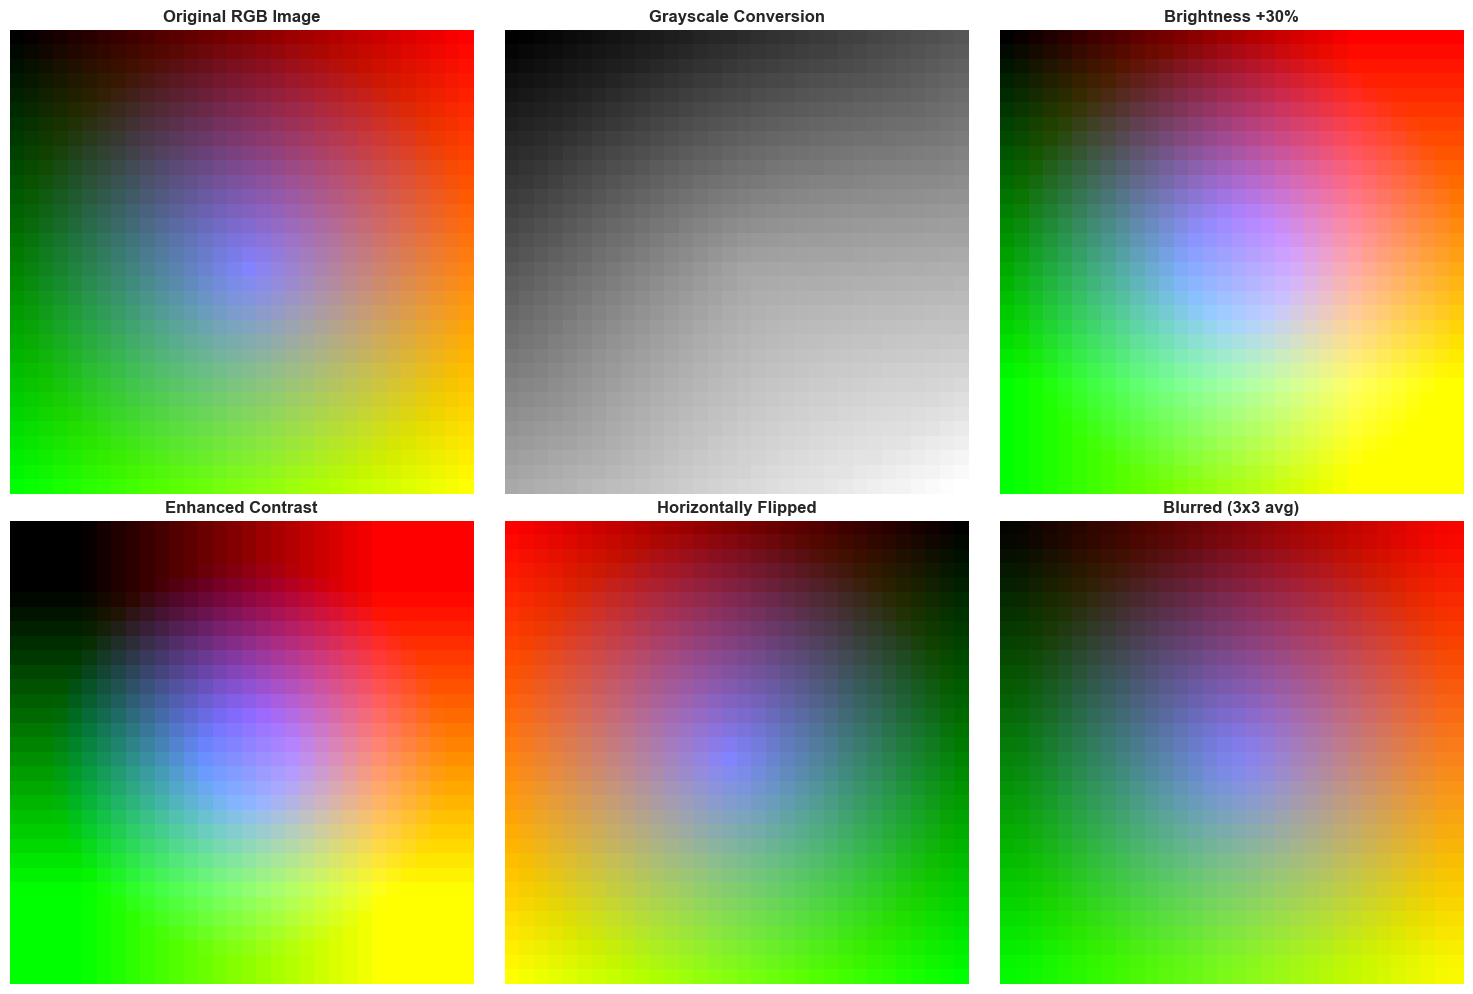


🧮 Tensor Operations Used:
   🎨 Grayscale: Broadcasting multiplication + sum reduction
   ☀️ Brightness: Element-wise multiplication + clamp
   🌓 Contrast: Element-wise operations with mean
   🔄 Flip: torch.flip() along specific dimension
   🌫️ Blur: Windowed mean operations

💡 Why This Matters for Neural Networks:
   📊 Images are just 3D tensors (channels × height × width)
   🧠 CNNs apply similar operations with learnable filters
   ⚡ All operations are differentiable for backpropagation
   🎯 Data augmentation uses these transformations


In [8]:
print("🖼️ Real-world Application: Image Processing")
print("=" * 44)

# Create a synthetic image (3 channels, 64x64 pixels)
torch.manual_seed(42)
# Simulate an RGB image
height, width = 32, 32
image = torch.zeros(3, height, width)

# Create a simple pattern
# Red channel: horizontal gradient
for i in range(height):
    image[0, i, :] = torch.linspace(0, 1, width)

# Green channel: vertical gradient
for j in range(width):
    image[1, :, j] = torch.linspace(0, 1, height)

# Blue channel: circular pattern
center_y, center_x = height // 2, width // 2
for i in range(height):
    for j in range(width):
        distance = ((i - center_y) ** 2 + (j - center_x) ** 2) ** 0.5
        image[2, i, j] = 1 - min(distance / (height // 2), 1)

print(f"Image shape: {image.shape} (channels, height, width)")
print(f"Image value range: [{image.min():.2f}, {image.max():.2f}]")

# Common image operations using tensor operations
print("\n🛠️ Image Processing Operations:")

# 1. Convert to grayscale
# Standard RGB to grayscale conversion: 0.299*R + 0.587*G + 0.114*B
rgb_weights = torch.tensor([0.299, 0.587, 0.114]).view(3, 1, 1)
grayscale = (image * rgb_weights).sum(dim=0)
print(f"Grayscale conversion: {image.shape} → {grayscale.shape}")

# 2. Brightness adjustment
brightness_factor = 1.3
bright_image = torch.clamp(image * brightness_factor, 0, 1)
print(f"Brightness adjustment: multiply by {brightness_factor}, clamp to [0,1]")

# 3. Contrast adjustment
contrast_factor = 1.5
mean_val = image.mean()
contrast_image = torch.clamp((image - mean_val) * contrast_factor + mean_val, 0, 1)
print(f"Contrast adjustment: enhance differences from mean")

# 4. Horizontal flip
flipped_image = torch.flip(image, dims=[2])  # Flip along width dimension
print(f"Horizontal flip: reverse width dimension")

# 5. Simple blur (average pooling)
# Create a 3x3 averaging kernel
kernel_size = 3
pad = kernel_size // 2
padded_image = torch.nn.functional.pad(image, (pad, pad, pad, pad), mode="reflect")
blurred_image = torch.zeros_like(image)

for i in range(height):
    for j in range(width):
        # Extract 3x3 patch and take mean
        patch = padded_image[:, i : i + kernel_size, j : j + kernel_size]
        blurred_image[:, i, j] = patch.mean(dim=(1, 2))

print(f"Blur: 3x3 averaging filter")

# Visualize all operations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
original_rgb = image.permute(1, 2, 0).numpy()  # Convert to HWC format
axes[0, 0].imshow(original_rgb)
axes[0, 0].set_title("Original RGB Image", fontweight="bold")
axes[0, 0].axis("off")

# Grayscale
axes[0, 1].imshow(grayscale.numpy(), cmap="gray")
axes[0, 1].set_title("Grayscale Conversion", fontweight="bold")
axes[0, 1].axis("off")

# Bright image
bright_rgb = bright_image.permute(1, 2, 0).numpy()
axes[0, 2].imshow(bright_rgb)
axes[0, 2].set_title("Brightness +30%", fontweight="bold")
axes[0, 2].axis("off")

# Contrast image
contrast_rgb = contrast_image.permute(1, 2, 0).numpy()
axes[1, 0].imshow(contrast_rgb)
axes[1, 0].set_title("Enhanced Contrast", fontweight="bold")
axes[1, 0].axis("off")

# Flipped image
flipped_rgb = flipped_image.permute(1, 2, 0).numpy()
axes[1, 1].imshow(flipped_rgb)
axes[1, 1].set_title("Horizontally Flipped", fontweight="bold")
axes[1, 1].axis("off")

# Blurred image
blurred_rgb = blurred_image.permute(1, 2, 0).numpy()
axes[1, 2].imshow(blurred_rgb)
axes[1, 2].set_title("Blurred (3x3 avg)", fontweight="bold")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

# Show tensor operations used
print("\n🧮 Tensor Operations Used:")
print("   🎨 Grayscale: Broadcasting multiplication + sum reduction")
print("   ☀️ Brightness: Element-wise multiplication + clamp")
print("   🌓 Contrast: Element-wise operations with mean")
print("   🔄 Flip: torch.flip() along specific dimension")
print("   🌫️ Blur: Windowed mean operations")

print("\n💡 Why This Matters for Neural Networks:")
print("   📊 Images are just 3D tensors (channels × height × width)")
print("   🧠 CNNs apply similar operations with learnable filters")
print("   ⚡ All operations are differentiable for backpropagation")
print("   🎯 Data augmentation uses these transformations")

## Advanced Operations and Tips 🚀

Let's explore some advanced tensor operations that you'll encounter in complex neural networks:


In [9]:
print("🚀 Advanced Tensor Operations")
print("=" * 31)

# Batched operations
print("📦 Batched Operations (crucial for training):")
batch_size = 4
sequence_length = 6
feature_dim = 8

# Simulate a batch of sequences (like text or time series)
batch_data = torch.randn(batch_size, sequence_length, feature_dim)
print(f"Batch shape: {batch_data.shape} (batch, sequence, features)")

# Operations across different dimensions
batch_mean = batch_data.mean(dim=0)  # Average across batch
sequence_mean = batch_data.mean(dim=1)  # Average across sequence
feature_mean = batch_data.mean(dim=2)  # Average across features

print(f"Mean across batch: {batch_mean.shape}")
print(f"Mean across sequence: {sequence_mean.shape}")
print(f"Mean across features: {feature_mean.shape}")

# Advanced indexing
print("\n🎯 Advanced Indexing Techniques:")
data = torch.randn(5, 4)
print(f"Original data (5x4):\n{data}")

# Select specific rows and columns
row_indices = torch.tensor([0, 2, 4])
col_indices = torch.tensor([1, 3])
selected = data[row_indices][:, col_indices]
print(
    f"\nSelected rows {row_indices.tolist()}, cols {col_indices.tolist()}:\n{selected}"
)

# Boolean masking
mask = data > 0
positive_values = data[mask]
print(f"\nPositive values: {positive_values}")
print(f"Number of positive values: {mask.sum()}")

# Tensor concatenation and stacking
print("\n🔗 Concatenation and Stacking:")
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Concatenate
cat_dim0 = torch.cat([a, b], dim=0)  # Stack vertically
cat_dim1 = torch.cat([a, b], dim=1)  # Stack horizontally
print(f"Original tensors a and b (2x2 each)")
print(f"Concatenate dim=0 (vertical): {cat_dim0.shape}\n{cat_dim0}")
print(f"\nConcatenate dim=1 (horizontal): {cat_dim1.shape}\n{cat_dim1}")

# Stack (creates new dimension)
stacked = torch.stack([a, b], dim=0)
print(f"\nStack (new dim): {stacked.shape}\n{stacked}")

# Gather and scatter operations
print("\n📍 Gather and Scatter Operations:")
source = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
indices = torch.tensor([[0, 2], [1, 3], [2, 0]])

gathered = torch.gather(source, 1, indices)
print(f"Source:\n{source}")
print(f"Indices:\n{indices}")
print(f"Gathered:\n{gathered}")

# Einsum (Einstein summation) - very powerful!
print("\n🧠 Einstein Summation (einsum):")
A = torch.randn(3, 4)
B = torch.randn(4, 5)

# Matrix multiplication using einsum
result_matmul = torch.einsum("ik,kj->ij", A, B)
result_normal = A @ B
print(f"Einsum matrix mult: {result_matmul.shape}")
print(f"Are results equal? {torch.allclose(result_matmul, result_normal)}")

# Batch matrix multiplication
batch_A = torch.randn(2, 3, 4)
batch_B = torch.randn(2, 4, 5)
batch_result = torch.einsum("bik,bkj->bij", batch_A, batch_B)
print(f"Batch einsum: {batch_A.shape} × {batch_B.shape} → {batch_result.shape}")

# Trace (sum of diagonal elements)
trace_result = torch.einsum("ii->", torch.randn(4, 4))
print(f"Trace using einsum: {trace_result}")

print("\n💡 Advanced Tips:")
print("   🎯 Use torch.einsum for complex tensor operations")
print("   📦 Always think in batches for neural networks")
print("   🔍 Boolean masking is powerful for conditional operations")
print("   🔗 Cat vs stack: cat joins along existing dim, stack creates new dim")
print("   ⚡ Gather/scatter are efficient for sparse operations")

🚀 Advanced Tensor Operations
📦 Batched Operations (crucial for training):
Batch shape: torch.Size([4, 6, 8]) (batch, sequence, features)
Mean across batch: torch.Size([6, 8])
Mean across sequence: torch.Size([4, 8])
Mean across features: torch.Size([4, 6])

🎯 Advanced Indexing Techniques:
Original data (5x4):
tensor([[ 1.7744, -0.9216,  0.9624, -0.3370],
        [ 0.1543,  0.4408, -0.1483, -2.3184],
        [ 1.3032,  0.4879,  1.1340, -0.3556],
        [ 0.3094, -0.5003,  1.0350,  1.6896],
        [ 0.0213, -0.8293, -1.0809, -0.7839]])

Selected rows [0, 2, 4], cols [1, 3]:
tensor([[-0.9216, -0.3370],
        [ 0.4879, -0.3556],
        [-0.8293, -0.7839]])

Positive values: tensor([1.7744, 0.9624, 0.1543, 0.4408, 1.3032, 0.4879, 1.1340, 0.3094, 1.0350,
        1.6896, 0.0213])
Number of positive values: 11

🔗 Concatenation and Stacking:
Original tensors a and b (2x2 each)
Concatenate dim=0 (vertical): torch.Size([4, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


## Summary & What's Next 📝

🎉 **Excellent work!** You've mastered advanced tensor operations and mathematics in PyTorch!

### 🎯 What You Learned:

1. **Broadcasting**:

   - How operations work between tensors of different shapes
   - Memory and performance benefits
   - Real-world applications

2. **Element-wise Operations**:

   - Arithmetic, mathematical, and logical operations
   - Comparison and boolean operations
   - When and how to use each type

3. **Reduction Operations**:

   - Sum, mean, max, min across dimensions
   - Understanding dimension collapse
   - Statistical computations

4. **Linear Algebra**:

   - Matrix multiplication (the heart of neural networks!)
   - Dot products and norms
   - Transpose and other matrix operations

5. **Performance Optimization**:

   - In-place vs non-in-place operations
   - Views vs copies
   - Vectorization vs loops
   - Memory management tips

6. **Real-world Applications**:
   - Image processing with tensors
   - Advanced indexing and batched operations
   - Einstein summation for complex operations

### 🧠 Key Insights:

- **Tensors are the universal language** of deep learning
- **Matrix multiplication is fundamental** to neural networks
- **Broadcasting makes operations efficient** and code clean
- **Performance matters** - always vectorize and use appropriate operations
- **Everything in neural networks** can be expressed as tensor operations

### 🚀 What's Next?

Now that you're a tensor operations expert, we'll move on to:

- **Neural Network Theory**: Understanding how networks learn
- **Building Networks**: From perceptrons to deep networks
- **Automatic Differentiation**: How PyTorch computes gradients
- **Training Loops**: Putting it all together

**Ready to understand the theory behind neural networks? Let's continue to [03. Neural Network Theory](03_neural_network_theory.ipynb)!** 🧠
